In [2]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_notebook, show
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

paths = ['C:/Users/Ali Arda/Desktop/Dosyalar/Kodlar/İsar/Proje/DataSet_Global2000/aroissues-forbes-global-2000-2008-2019/G2000_{}.xlsx'.format(i) for i in range(8, 23)]
dfs = [pd.read_excel(path).head(200) for path in paths]


years = range(2008, 2023)
for i, df in enumerate(dfs):
    df['Year'] = years[i]


data_set = pd.concat(dfs, ignore_index=True)

data_set.drop(['Rank_nr'], axis= 1, inplace=True)


In [4]:
import pandas as pd
import plotly.express as px


market_values = data_set.groupby('Year')['Market_Value'].sum().reset_index()


market_values['Market_Value'] = market_values['Market_Value'] / 10**6


fig = px.line(market_values, x='Year', y='Market_Value', title='Top 200 Toplam Piyasa Değeri (Trilyon Dolar)',
              labels={'Year': 'Yıl', 'Market_Value': 'Trilyon Dolar'})

fig.show()

In [7]:
import plotly.graph_objects as go

total_market_value = data_set.groupby(['Year'])['Market_Value'].sum()
american_market_value = data_set[data_set['Country'] == 'United States'].groupby(['Year'])['Market_Value'].sum()
chinese_market_value = data_set[data_set['Country'] == 'China'].groupby(['Year'])['Market_Value'].sum()
uk_market_value = data_set[data_set['Country'] == 'United Kingdom'].groupby(['Year'])['Market_Value'].sum()
ger_mv = data_set[data_set['Country'] == 'Germany'].groupby(['Year'])['Market_Value'].sum()


american_proportion = american_market_value / total_market_value
chinese_proportion = chinese_market_value / total_market_value
uk_proportion = uk_market_value/ total_market_value
ger_proportion = ger_mv/total_market_value


fig = go.Figure()

fig.add_trace(go.Scatter(x=total_market_value.index, y=american_proportion*100, mode='lines', name='Amerikan Firmalar'))
fig.add_trace(go.Scatter(x=total_market_value.index, y=chinese_proportion*100, mode='lines', name='Çinli Firmalar'))
fig.add_trace(go.Scatter(x=total_market_value.index, y=uk_proportion*100, mode='lines', name='İngiliz Firmalar'))
fig.add_trace(go.Scatter(x=total_market_value.index, y=ger_proportion*100, mode='lines', name='Alman Firmalar'))


fig.update_layout(
    title='Ülkelerin Top 200deki Payı (Piyasa Değerine Göre)',
    xaxis_title='Yıl',
    yaxis_title='Yüzde (%)',
)


fig.show()

In [8]:
total_market_value = data_set.groupby(['Year'])['Market_Value'].sum()

banking_mv = data_set[data_set['Industry'] == 'Banking'].groupby(['Year'])['Market_Value'].sum()/total_market_value
fin_mv = data_set[data_set['Industry'] == 'Diversified Financials'].groupby(['Year'])['Market_Value'].sum()/total_market_value
finans_mv = (banking_mv + fin_mv)

it_mv = data_set[data_set['Industry'] == 'IT Software & Services'].groupby(['Year'])['Market_Value'].sum()/total_market_value
tek_mv = data_set[data_set['Industry'] == 'Technology Hardware & Equipment'].groupby(['Year'])['Market_Value'].sum()/total_market_value
tech_mv = (it_mv + tek_mv)

oil_mv = data_set[data_set['Industry'] == 'Oil & Gas Operations'].groupby(['Year'])['Market_Value'].sum()/total_market_value
retail_mv = data_set[data_set['Industry'] == 'Retailing'].groupby(['Year'])['Market_Value'].sum()/total_market_value



fig = go.Figure()

fig.add_trace(go.Scatter(x=total_market_value.index, y=oil_mv*100, mode='lines', name='Petrol'))
fig.add_trace(go.Scatter(x=total_market_value.index, y=tech_mv*100, mode='lines', name='Tech'))
fig.add_trace(go.Scatter(x=total_market_value.index, y=retail_mv*100, mode='lines', name='Perakende'))
fig.add_trace(go.Scatter(x=total_market_value.index, y=finans_mv*100, mode='lines', name='Finans'))

fig.update_layout(
    title='Sektörlerin Piyasa Büyüklüğündeki Payı (Piyasa Değerine Göre)',
    xaxis_title='Year',
    yaxis_title='Yüzde (%)',
)

fig.show()

In [9]:
import plotly.graph_objects as go

data_set.replace('Amazon.com', 'Amazon', inplace=True)
data_set.replace('Alphabet', 'Google', inplace=True)
data_set.replace('Meta Platforms', 'Facebook', inplace=True)

gafam_companies = ['Google', 'Apple', 'Facebook', 'Amazon', 'Microsoft']
df_filtered = data_set[(data_set['Company'].isin(gafam_companies))]


traces = []
for company in gafam_companies:
    company_df = df_filtered[df_filtered['Company'] == company]
    traces.append(go.Scatter(x=company_df['Year'], y=company_df['Market_Value'], mode='lines', name=company))


fig = go.Figure(traces)


fig.update_layout(
    title='Gafam Şirketlerinin Piyasa Değeri',
    xaxis_title='Yıl',
    yaxis_title='Piyasa Değeri (Milyon Dolar)',
)


fig.show()


In [10]:
fig_satis_kar = px.scatter(data_set, x='Sales', y='Profits', color='Industry', size='Market_Value', hover_name='Company')

fig_satis_kar.show()

In [11]:
gafam_companies = ['Google', 'Apple', 'Facebook', 'Amazon', 'Microsoft']
gafam_ds = data_set[data_set['Company'].isin(gafam_companies)]


fig_satis_kar = px.scatter(gafam_ds, x='Sales', y='Profits', color='Company', size='Market_Value', hover_name='Year')

fig_satis_kar.show()

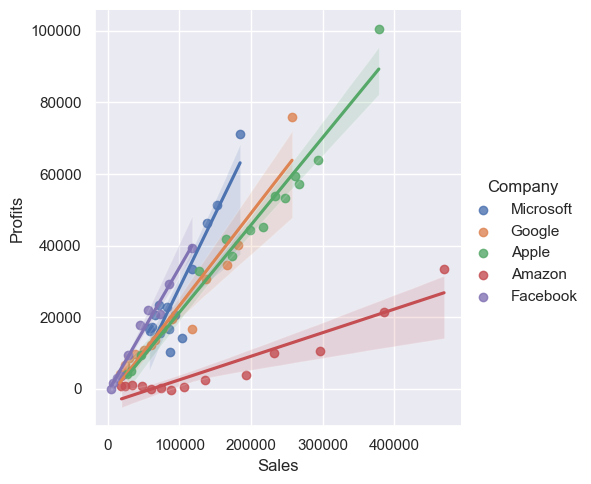

In [16]:
sns.set(style="darkgrid")
sns.lmplot(x="Sales", y="Profits", hue="Company", data=gafam_ds)

In [18]:
fin_sek = ['Banking', 'Diversified Financials']
m_v = ['Matercard', 'Visa']
fin_ds = data_set[data_set['Industry'].isin(fin_sek) | data_set['Country'].isin(m_v)]
fin_ds = fin_ds[fin_ds['Market_Value'] > 200000]

fig_satis_kar_fin = px.scatter(fin_ds, x='Sales', y='Profits', color='Company', size='Market_Value', hover_name='Year')

fig_satis_kar_fin.show()

In [19]:
bankas = ['ICBC', 'Berkshire Hathaway', 'China Construction Bank', 'Wells Fargo', 'HSBC Holdings', 'JPMorgan Chase', 'Bank of America' ]
bankas_ds = data_set[data_set['Company'].isin(bankas)]


traces = []
for company in bankas:
    company_df = bankas_ds[bankas_ds['Company'] == company]
    traces.append(go.Scatter(x=company_df['Year'], y=company_df['Assets'], mode='lines', name=company))


fig = go.Figure(traces)


fig.update_layout(
    title='Bankaların Sahip Olduğu Varlıklar',
    xaxis_title='Yıl',
    yaxis_title='Toplam Varlık Değeri (Milyon Dolar)',
)


fig.show()

In [20]:
m_v = ['Mastercard', 'Visa', 'PayPal']
mv_ds = data_set[data_set['Company'].isin(m_v)]

traces = []
for company in m_v:
    company_df = mv_ds[mv_ds['Company'] == company]
    traces.append(go.Scatter(x=company_df['Year'], y=company_df['Market_Value'], mode='lines', name=company))

fig = go.Figure(traces)


fig.update_layout(
    title='Bitmeyen Rekabet Visa vs Matercard',
    xaxis_title='Yıl',
    yaxis_title='Piyasa Değeri (Milyon Dolar)',
)


fig.show()
